In [1]:
import numpy as np
import xgboost as xgb
import pandas as pd
from xgboost.sklearn import XGBRegressor
from sklearn import model_selection, metrics
import matplotlib.pyplot as pl
import itertools

%matplotlib inline

/usr/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv("train.tsv")

In [35]:
for i in range(1, 31):
    for j_1, j_2 in zip(train['f{}'.format(i)], train['f{}'.format(i + 30)]):
        if j_1 != j_2:
            print("different!")

In [3]:
train.drop(["f{}".format(i) for i in range(31, 61)], axis=1, inplace=True)

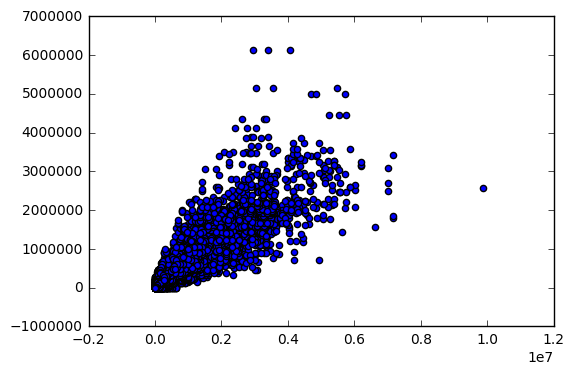

In [66]:
pl.figure()
pl.scatter(train["y"], train["f20"])

In [4]:
def SMAPE(regressor, X, y):
    prediction = regressor.predict(X)
    result = 0
    for ans, right_ans in zip(prediction, np.array(y)):
        result += abs(ans - right_ans) / (abs(right_ans) + abs(ans))
    return result * 200 / len(y)
    
def test_regressor(regressor, data, target, features):
    tscv = model_selection.TimeSeriesSplit(n_splits=5)
    score = []
    for train_index, test_index in tscv.split(data):
        X_train, X_test = data[features].values[train_index], data[features].values[test_index]
        y_train, y_test = data[target].values[train_index], data[target].values[test_index]
        regressor.fit(X_train, y_train, eval_metric='mae')
        score.append(SMAPE(regressor, X_test, y_test))

    return np.array(score).mean()

def print_params(params_arr, names_arr, params):
    for i, p, name in zip(range(len(params)), params, names_arr):
        if len(params_arr[i]) > 1:
            if isinstance(p, int):
                print("{} = {}".format(name, p), end="  ") 
            else:
                print("{} = {:.4f}".format(name, p), end="  ")  

def get_best_params(params_arr, names_arr, train, target, features):
    maximum = 200
    best_params = []
    for params in itertools.product(*params_arr):
        param_dict = {}
        for i, name in enumerate(names_arr):
            param_dict[name] = params[i]
        print_params(params_arr, names_arr, params)
        result = test_regressor(XGBRegressor(**param_dict), train, target, features)
        print("SMPAE = {:.4f}".format(result))
        if (result < maximum):
            maximum = result
            best_params = params
    print("best parametrs:")
    print_params(params_arr, names_arr, best_params)

In [15]:
target = ['y']
features = [x for x in train.columns if x not in ['y']]#, 'year', 'weak', 'shift']]
param_names = ['learning_rate',
               'n_estimators',
               'max_depth',
               'min_child_weight',
               'gamma',
               'subsample',
               'colsample_bytree',
               'nthread',
               'seed',
               'reg_alpha'
              ]

In [16]:
params_1 = [[0.1], range(1, 130, 10), [5], [1], [0], [0.8], [0.8], [4], [27], [0]]
get_best_params(params_1, param_names, train, target, features)

n_estimators = 1  SMPAE = 149.2752
n_estimators = 11  SMPAE = 52.1955
n_estimators = 21  SMPAE = 40.8424
n_estimators = 31  SMPAE = 41.0450
n_estimators = 41  SMPAE = 41.6465
n_estimators = 51  SMPAE = 50.9841
n_estimators = 61  SMPAE = 54.5769
n_estimators = 71  SMPAE = 54.3799
n_estimators = 81  SMPAE = 54.9285
n_estimators = 91  SMPAE = 58.4657
n_estimators = 101  SMPAE = 60.5727
n_estimators = 111  SMPAE = 60.3552
n_estimators = 121  SMPAE = 61.2317
best parametrs:
n_estimators = 21  

In [17]:
params_1_b = [[0.1], range(12, 31, 2), [5], [1], [0], [0.8], [0.8], [4], [27], [0]]
get_best_params(params_1_b, param_names, train, target, features)

n_estimators = 12  SMPAE = 49.7489
n_estimators = 14  SMPAE = 46.0602
n_estimators = 16  SMPAE = 43.6033
n_estimators = 18  SMPAE = 42.0273
n_estimators = 20  SMPAE = 41.0641
n_estimators = 22  SMPAE = 40.6355
n_estimators = 24  SMPAE = 40.3072
n_estimators = 26  SMPAE = 40.3252
n_estimators = 28  SMPAE = 40.5571
n_estimators = 30  SMPAE = 40.8444
best parametrs:
n_estimators = 24  

In [18]:
params_2 = [[0.1], [24], range(3, 11), range(1, 6), [0], [0.8], [0.8], [4], [27], [0]]
get_best_params(params_2, param_names, train, target, features)

max_depth = 3  min_child_weight = 1  SMPAE = 58.5355
max_depth = 3  min_child_weight = 2  SMPAE = 58.5141
max_depth = 3  min_child_weight = 3  SMPAE = 58.5376
max_depth = 3  min_child_weight = 4  SMPAE = 58.2164
max_depth = 3  min_child_weight = 5  SMPAE = 59.2792
max_depth = 4  min_child_weight = 1  SMPAE = 46.8203
max_depth = 4  min_child_weight = 2  SMPAE = 46.8001
max_depth = 4  min_child_weight = 3  SMPAE = 46.7608
max_depth = 4  min_child_weight = 4  SMPAE = 46.5894
max_depth = 4  min_child_weight = 5  SMPAE = 46.6156
max_depth = 5  min_child_weight = 1  SMPAE = 40.3072
max_depth = 5  min_child_weight = 2  SMPAE = 40.0907
max_depth = 5  min_child_weight = 3  SMPAE = 40.5044
max_depth = 5  min_child_weight = 4  SMPAE = 40.5693
max_depth = 5  min_child_weight = 5  SMPAE = 40.2165
max_depth = 6  min_child_weight = 1  SMPAE = 37.0511
max_depth = 6  min_child_weight = 2  SMPAE = 36.8627
max_depth = 6  min_child_weight = 3  SMPAE = 36.8549
max_depth = 6  min_child_weight = 4  SMPAE = 3

In [19]:
params_3 = [[0.1], [24], [10], [3], np.linspace(0, 0.3, 15), [0.8], [0.8], [4], [27], [0]]
get_best_params(params_3, param_names, train, target, features)

gamma = 0.0000  SMPAE = 31.1221
gamma = 0.0214  SMPAE = 31.1221
gamma = 0.0429  SMPAE = 31.1221
gamma = 0.0643  SMPAE = 31.1221
gamma = 0.0857  SMPAE = 31.1221
gamma = 0.1071  SMPAE = 31.1221
gamma = 0.1286  SMPAE = 31.1221
gamma = 0.1500  SMPAE = 31.1221
gamma = 0.1714  SMPAE = 31.1221
gamma = 0.1929  SMPAE = 31.1221
gamma = 0.2143  SMPAE = 31.1221
gamma = 0.2357  SMPAE = 31.1221
gamma = 0.2571  SMPAE = 31.1221
gamma = 0.2786  SMPAE = 31.1221
gamma = 0.3000  SMPAE = 31.1221
best parametrs:
gamma = 0.0000  

In [20]:
params_4 = [[0.1], [24], [10], [3], [0], np.linspace(0.6, 0.9, 5),
            np.linspace(0.6, 0.9, 5), [4], [27], [0]]
get_best_params(params_4, param_names, train, target, features)

subsample = 0.6000  colsample_bytree = 0.6000  SMPAE = 31.6825
subsample = 0.6000  colsample_bytree = 0.6750  SMPAE = 32.2265
subsample = 0.6000  colsample_bytree = 0.7500  SMPAE = 31.6061
subsample = 0.6000  colsample_bytree = 0.8250  SMPAE = 32.1709
subsample = 0.6000  colsample_bytree = 0.9000  SMPAE = 31.4357
subsample = 0.6750  colsample_bytree = 0.6000  SMPAE = 31.5371
subsample = 0.6750  colsample_bytree = 0.6750  SMPAE = 33.4357
subsample = 0.6750  colsample_bytree = 0.7500  SMPAE = 32.6733
subsample = 0.6750  colsample_bytree = 0.8250  SMPAE = 31.3350
subsample = 0.6750  colsample_bytree = 0.9000  SMPAE = 31.5691
subsample = 0.7500  colsample_bytree = 0.6000  SMPAE = 31.7621
subsample = 0.7500  colsample_bytree = 0.6750  SMPAE = 31.3578
subsample = 0.7500  colsample_bytree = 0.7500  SMPAE = 31.3575
subsample = 0.7500  colsample_bytree = 0.8250  SMPAE = 31.3654
subsample = 0.7500  colsample_bytree = 0.9000  SMPAE = 31.1262
subsample = 0.8250  colsample_bytree = 0.6000  SMPAE = 

In [25]:
params_5 = [[0.1], [24], [10], [3], [0], [0.9], [0.825], [4], [27], [10**(i) for i in [4, 2, 1, 0, -1]]]
get_best_params(params_5, param_names, train, target, features)

reg_alpha = 10000  SMPAE = 31.5431
reg_alpha = 100  SMPAE = 31.5541
reg_alpha = 10  SMPAE = 30.8369
reg_alpha = 1  SMPAE = 31.0484
reg_alpha = 0.1000  SMPAE = 31.0247
best parametrs:
reg_alpha = 10  

In [26]:
params_5_b = [[0.1], [24], [10], [3], [0], [0.9], [0.825], [4], [27],
            [2, 3, 5, 8, 10, 12, 15, 20]]
get_best_params(params_5_b, param_names, train, target, features)

reg_alpha = 2  SMPAE = 31.0484
reg_alpha = 3  SMPAE = 31.0484
reg_alpha = 5  SMPAE = 31.0886
reg_alpha = 8  SMPAE = 30.8369
reg_alpha = 10  SMPAE = 30.8369
reg_alpha = 12  SMPAE = 30.8843
reg_alpha = 15  SMPAE = 30.8842
reg_alpha = 20  SMPAE = 30.8842
best parametrs:
reg_alpha = 10  

In [28]:
params_6 = [[0.01], [100, 200, 300, 400, 500], [10], [3], [0], [0.9], [0.825], [4], [27], [10]]
get_best_params(params_6, param_names, train, target, features)

n_estimators = 100  SMPAE = 49.1677
n_estimators = 200  SMPAE = 32.1781
n_estimators = 300  SMPAE = 30.6165
n_estimators = 400  SMPAE = 30.6523
n_estimators = 500  SMPAE = 30.8130
best parametrs:
n_estimators = 300  

In [30]:
params_6_b = [[0.01], range(250, 360, 10), [10], [3], [0], [0.9], [0.825], [4], [27], [10]]
get_best_params(params_6_b, param_names, train, target, features)

n_estimators = 250  SMPAE = 30.7353
n_estimators = 260  SMPAE = 30.6806
n_estimators = 270  SMPAE = 30.6057
n_estimators = 280  SMPAE = 30.6048
n_estimators = 290  SMPAE = 30.5742
n_estimators = 300  SMPAE = 30.6165
n_estimators = 310  SMPAE = 30.5873
n_estimators = 320  SMPAE = 30.5841
n_estimators = 330  SMPAE = 30.5744
n_estimators = 340  SMPAE = 30.5555
n_estimators = 350  SMPAE = 30.5694
best parametrs:
n_estimators = 340  

In [31]:
final_params = [0.01, 340, 10, 3, 0, 0.9, 0.825, 4, 27, 1]

test = pd.read_csv("test.tsv")
param_dict = {}
for i, name in enumerate(param_names):
    param_dict[name] = final_params[i]

regressor = XGBRegressor(**param_dict)

In [34]:
test.drop(["f{}".format(i) for i in range(31, 61)], axis=1, inplace=True)

In [32]:
regressor.fit(train[features].values, train[target].values)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.825,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=3, missing=None, n_estimators=340, nthread=4,
       objective='reg:linear', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9)

In [35]:
final_answer = regressor.predict(test[features].values)

In [36]:
sample_submission = pd.read_csv("sample_submission.tsv")
sample_submission['y'] = final_answer
sample_submission.to_csv("submission1.tsv", sep=',', index=False)